The following is for plotting 90 and 95 confidence interval

/var/folders/w9/pv3pm_c55ts0y50r_p4hb96w0000gn/T/ipykernel_24464/73146150.py:9: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  all_rewards = np.array(data['rewards'])  # shape: (num_seeds, num_episodes)


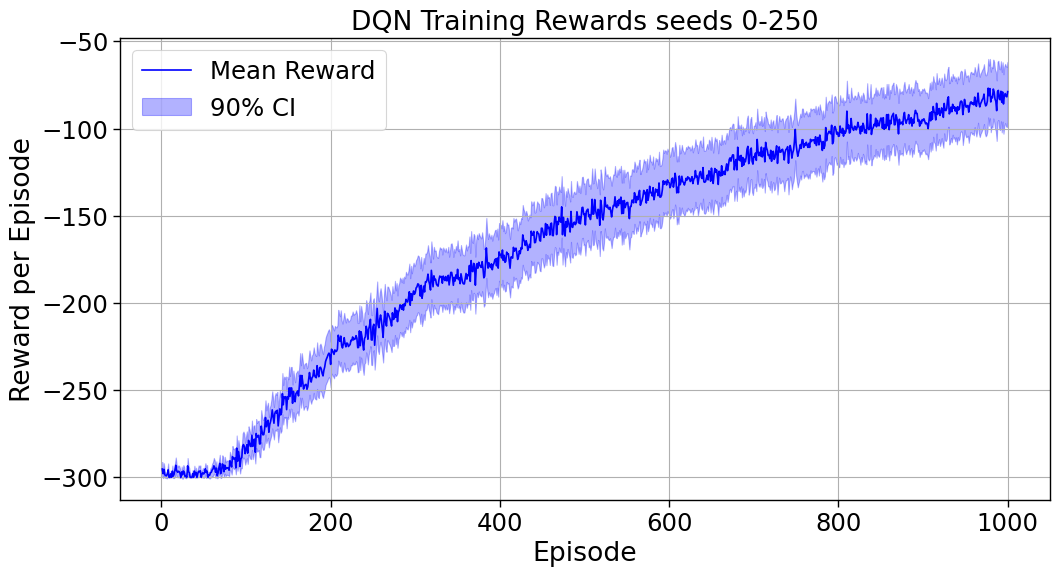

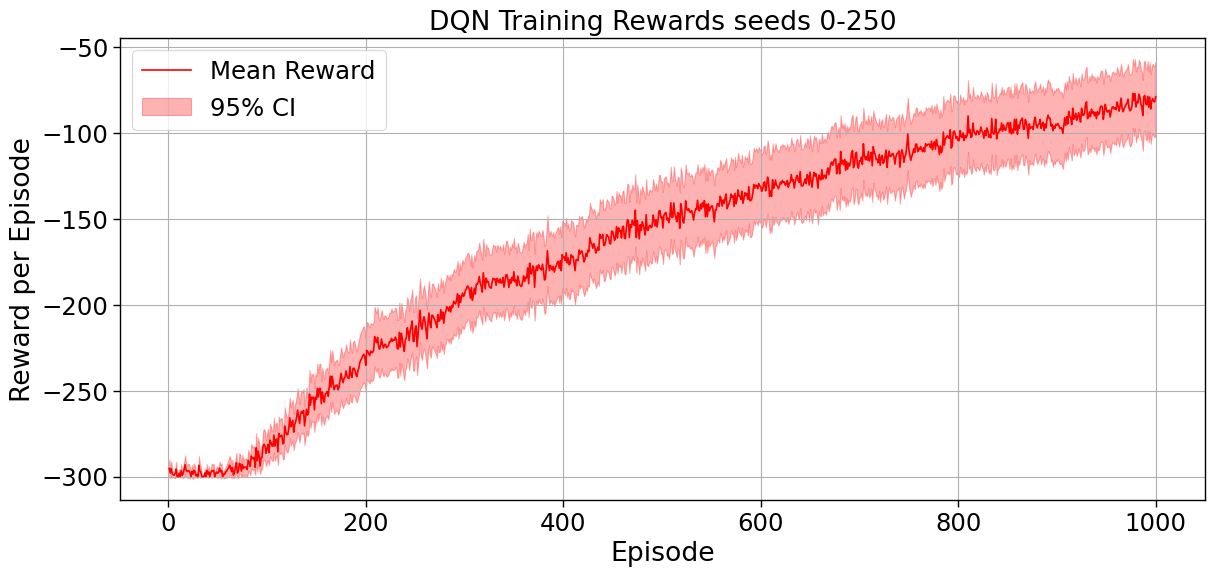

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the saved rewards
pt_file = "../CC_DQN/dqn_reward_seeds.pt"
data = torch.load(pt_file)
all_rewards = np.array(data['rewards'])  # shape: (num_seeds, num_episodes)

# Ensure 2D shape
if all_rewards.ndim == 1:
    all_rewards = all_rewards.reshape(1, -1)

num_seeds, num_episodes = all_rewards.shape

# Compute mean and std across seeds
mean_rewards = np.mean(all_rewards, axis=0)
std_rewards = np.std(all_rewards, axis=0)

episodes = np.arange(1, num_episodes + 1)

# 90% confidence interval
ci_90 = 1.645 * (std_rewards / np.sqrt(num_seeds))
plt.figure(figsize=(12,6))
sns.set_context("paper", font_scale=2)
sns.lineplot(x=episodes, y=mean_rewards, label="Mean Reward", color="blue")
plt.fill_between(episodes, mean_rewards - ci_90, mean_rewards + ci_90,
                 alpha=0.3, color="blue", label="90% CI")
plt.title("DQN Training Rewards seeds 0-250")
plt.xlabel("Episode")
plt.ylabel("Reward per Episode")
plt.grid(True)
plt.legend()
plt.show()

# 95% confidence interval
ci_95 = 1.96 * (std_rewards / np.sqrt(num_seeds))
plt.figure(figsize=(14,6))
sns.set_context("paper", font_scale=2)
sns.lineplot(x=episodes, y=mean_rewards, label="Mean Reward", color="red")
plt.fill_between(episodes, mean_rewards - ci_95, mean_rewards + ci_95,
                 alpha=0.3, color="red", label="95% CI")
plt.title("DQN Training Rewards seeds 0-250")
plt.xlabel("Episode")
plt.ylabel("Reward per Episode")
plt.grid(True)
plt.legend()
plt.show()


The following is for statistical testing of Cohen’s d and wilcoxon sign ranked. I changed tests because we essentially have paired data were we are comparing seed vs seed. I did average reward of seed vs average reward of other seed

In [8]:
import torch
import numpy as np
from scipy.stats import wilcoxon

def cohen_d_paired(x, y):
    x = np.array(x)
    y = np.array(y)
    assert x.shape == y.shape, "x and y must have the same shape"
    diff = x - y
    return diff.mean() / diff.std(ddof=1)


file1 = "../CC_DQN/dqn_reward_seeds.pt"
file2 = "../CC_DQN/dqn_reward_seeds.pt"


rewards1 = np.array(torch.load(file1)['rewards']) 
rewards2 = np.array(torch.load(file2)['rewards'])


rewards1_per_seed = rewards1.mean(axis=1)
rewards2_per_seed = rewards2.mean(axis=1) # mean of each seed 
stat, p_value = wilcoxon(rewards1_per_seed, rewards2_per_seed)
print(f"Wilcoxon signed-rank test: stat={stat}, p={p_value}")

d = cohen_d_paired(rewards1_per_seed, rewards2_per_seed)
print(f"Cohen's d (paired): {d:.3f}")


rewards1 = np.array(torch.load(file1)['rewards']) 
rewards2 = np.array(torch.load(file2)['rewards'])

# Aggregate per seed (total or mean reward across episodes)
rewards1_per_seed = rewards1.mean(axis=1)
rewards2_per_seed = rewards2.mean(axis=1)


stat, p_value = wilcoxon(rewards1_per_seed, rewards2_per_seed)
print(f"Wilcoxon signed-rank test: stat={stat}, p={p_value}")



Wilcoxon signed-rank test: stat=0.0, p=nan
Cohen's d (paired): nan
Wilcoxon signed-rank test: stat=0.0, p=nan


/var/folders/w9/pv3pm_c55ts0y50r_p4hb96w0000gn/T/ipykernel_24464/931833778.py:17: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  rewards1 = np.array(torch.load(file1)['rewards'])
/var/folders/w9/pv3pm_c55ts0y50r_p4hb96w0000gn/T/ipykernel_24464/931833778.py:18: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  rewards2 = np.array(torch.load(file2)['rewards'])
/opt/anaconda3/envs/rl/lib/python3.13/site-packages/scipy/stats/_wilcoxon.py:178: RuntimeWarning: invalid value encountere

In [9]:
# for testing data vs random 
import torch
import numpy as np
from scipy.stats import wilcoxon

def cohen_d_paired(x, y):
    """
    Compute Cohen's d for paired samples.
    """
    x = np.array(x)
    y = np.array(y)
    assert x.shape == y.shape, "x and y must have the same shape"
    diff = x - y
    return diff.mean() / diff.std(ddof=1)

# Load your real rewards
file_real = "../CC_DQN/dqn_reward_seeds.pt"
rewards_real = np.array(torch.load(file_real)['rewards'])  # shape: (num_seeds, num_episodes)

num_seeds, num_episodes = rewards_real.shape

# Generate random baseline rewards (same shape)
# Here we assume rewards are roughly in the same range as your real data
min_reward, max_reward = rewards_real.min(), rewards_real.max()
rewards_random = np.random.uniform(low=min_reward, high=max_reward, size=(num_seeds, num_episodes))

# Flatten for paired tests (each seed x episode is paired)
rewards_real_flat = rewards_real.flatten()
rewards_random_flat = rewards_random.flatten()

# Wilcoxon signed-rank test
stat, p_value = wilcoxon(rewards_real_flat, rewards_random_flat)
print(f"Wilcoxon signed-rank test vs random: stat={stat}, p={p_value:.6f}")

# Paired Cohen's d
d = cohen_d_paired(rewards_real_flat, rewards_random_flat)
print(f"Cohen's d vs random (paired): {d:.3f}")


Wilcoxon signed-rank test vs random: stat=11088828495.0, p=0.000000
Cohen's d vs random (paired): -0.258


/var/folders/w9/pv3pm_c55ts0y50r_p4hb96w0000gn/T/ipykernel_24464/2667573804.py:18: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  rewards_real = np.array(torch.load(file_real)['rewards'])  # shape: (num_seeds, num_episodes)
